In [2]:
from matplotlib import pyplot as plt
import numpy as np

## Get points coordinates

In [3]:
def getPoints(name_tsp):
    with open(name_tsp) as f_o:
            data= f_o.read()
            lines = data.splitlines()
    # store metadata set information 
    name = lines[0].split(' ')[1]
        # here we expect the name of the problem

    nPoints =  np.int(lines[3].split(' ')[1])
        # here we expect the number of points in the considered instance
        
#     best_sol = np.float(lines[5].split(' ')[1])
        # here the lenght of the best solution
        
        
        # read all data points and store them 
    points = np.zeros((nPoints, 3)) # this is the structure where we will store the pts data 
    for i in range(nPoints):
        line_i = lines[7 + i].split(' ')
        points[i, 0] = int(line_i[0])
        points[i, 1] = float(line_i[1])
        points[i, 2] = float(line_i[2])
    return points

### Functions to see the points and see the path

In [5]:
def plotPoints(points, nPoints):
    plt.figure(figsize=(8, 8))
    plt.scatter(points[:, 1], points[:, 2])
    for i, txt in enumerate(np.arange(nPoints)):  # tour_found[:-1]
        plt.annotate(txt, (points[i, 1], points[i, 2]))
    plt.show()

In [6]:
def plotSolution(ordered_points, points):
    plt.figure(figsize=(8, 8))
#     plt.scatter(points[:, 1], points[:, 2])
    for i, txt in enumerate(np.arange(len(points))):  # tour_found[:-1]
        plt.annotate(txt, (points[i, 1], points[i, 2]))
        
    ordX = []
    ordY = []
    
    for i in range(0, len(ordered_points)):
        ordX.append(points[ordered_points[i],1])
        ordY.append(points[ordered_points[i],2])
    plt.plot(ordX, ordY, marker='o', color='b')

    plt.show()

In [7]:
def compute_length(solution, dist_matrix):
    total_length = 0
    starting_node = solution[0]
    from_node = starting_node
    for node in solution[1:]:
        total_length += dist_matrix[from_node, node]
        from_node = node
    total_length += dist_matrix[starting_node, from_node]
    return total_length


def distance_euc(point_i, point_j):
    rounding = 0
    x_i, y_i = point_i[0], point_i[1]
    x_j, y_j = point_j[0], point_j[1]
    distance = np.sqrt((x_i - x_j) ** 2 + (y_i - y_j) ** 2)
    return round(distance, rounding)

def

In [27]:
class ProblemInstance:

    def __init__(self, name_tsp):
        self.exist_opt = False
        self.optimal_tour = None
        self.dist_matrix = None

        # read raw data
        self.file_name = name_tsp
        file_object = open(self.file_name)
        data = file_object.read()
        file_object.close()
        self.lines = data.splitlines()

        # store data set information
        self.name = self.lines[0].split(': ')[1]
        self.nPoints = np.int(self.lines[3].split(': ')[1])
        self.best_sol = np.float(self.lines[5].split(': ')[1])

        # read all data points and store them
        self.points = np.zeros((self.nPoints, 3))
        for i in range(self.nPoints):
            
            line_i = self.lines[7 + i].split(' ')
#             print(line_i)
            self.points[i, 0] = int(line_i[0])
            self.points[i, 1] = line_i[1]
            self.points[i, 2] = line_i[2]
        self.create_dist_matrix();
            
    def create_dist_matrix(self):
        self.dist_matrix = np.zeros((self.nPoints, self.nPoints))

        for i in range(self.nPoints):
            for j in range(i, self.nPoints):
                self.dist_matrix[i, j] = distance_euc(self.points[i][1:3], self.points[j][1:3])
        self.dist_matrix += self.dist_matrix.T
        
    def GAP(self, found):
        return np.round(
            ((found - self.best_sol) / self.best_sol) * 100, 3)

    def ValidateSolution(self, path):
        return min(path) == 0 and max(path) == self.nPoints-1 and len(path) == len(set(path)) \
        and sum(path) == sum(i for i in range(P.nPoints))

## PR439

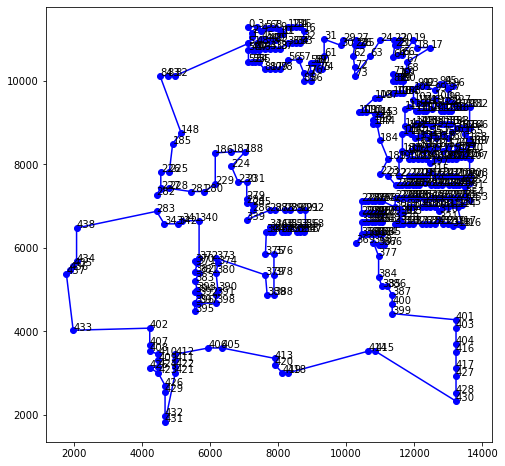

GAP IS: 0.055
Solution is valid:  True


In [28]:
x = [334,335,336,337,338,359,369,360,361,362,363,364,365,366,367,368,377,384,385,386,387,400,399,401,403,404,416,417,427,428,430,415,414,418,419,420,413,405,406,412,411,422,421,431,432,429,426,423,425,424,409,410,408,407,402,433,437,436,435,434,438,283,343,342,341,340,372,370,371,382,381,383,393,394,392,396,395,397,398,391,390,380,374,373,379,389,388,378,376,375,344,345,347,346,348,349,350,352,351,353,354,355,357,356,358,292,291,290,289,288,287,339,286,285,284,279,231,230,224,188,187,186,229,280,281,228,282,227,226,225,185,148,84,83,82,51,1,2,0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,32,33,34,35,36,37,38,41,43,39,40,42,44,45,48,46,47,49,50,52,53,54,55,81,80,79,78,56,57,77,85,86,76,58,59,60,75,74,61,31,30,29,27,25,26,28,62,72,73,63,24,22,20,21,23,64,65,66,19,18,17,67,68,69,70,71,87,88,89,90,103,104,105,106,107,108,109,110,111,145,143,146,147,144,184,189,223,222,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,209,210,211,212,213,214,215,216,217,218,219,220,221,190,183,149,150,152,153,154,155,156,157,158,159,160,161,162,133,134,135,136,137,138,139,140,141,151,142,112,113,115,117,118,120,121,100,119,116,114,102,101,91,92,93,99,94,95,96,97,98,124,122,123,125,126,128,127,129,130,131,132,166,164,163,165,168,167,169,170,171,172,173,203,174,175,176,177,178,179,180,181,182,191,192,193,194,195,196,197,198,199,200,201,202,204,205,206,207,208,250,252,251,254,253,315,314,316,317,318,319,320,321,322,323,324,325,326,327,328,330,331,329,302,301,303,304,305,306,307,308,309,310,311,312,313,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,300,272,273,274,275,276,277,278,293,294,295,296,297,298,299,332,333]
P = ProblemInstance('./problems/pr439.tsp')
points = getPoints('./problems/pr439.tsp')
plotSolution(x, points)
found = compute_length(x, P.dist_matrix)
print("GAP IS:", P.GAP(found))
print("Solution is valid: ", P.ValidateSolution(x))

## PCB442

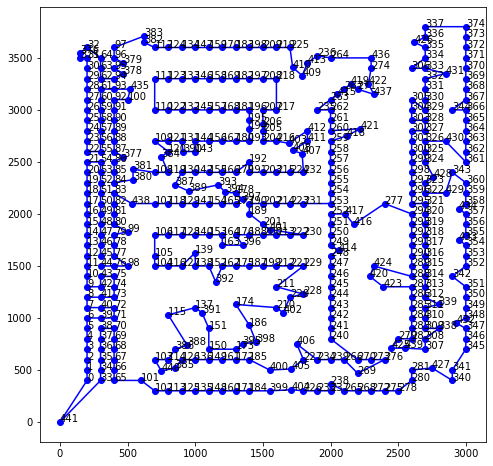

GAP IS: 0.912
Solution is valid:  True


In [30]:
x = [45,46,47,48,49,50,51,52,53,54,21,20,19,18,17,16,15,14,13,12,11,10,9,42,43,75,74,73,41,8,7,40,72,71,39,6,5,4,3,2,1,0,441,33,34,35,36,37,38,70,69,68,67,66,65,101,102,113,125,135,148,160,171,184,399,404,226,233,237,238,265,268,272,275,278,280,281,427,340,341,345,346,347,432,348,349,350,351,342,352,353,354,433,355,356,357,434,358,359,360,343,429,322,323,428,324,325,326,430,361,362,363,364,365,366,344,367,368,369,370,371,372,373,374,337,336,426,335,334,306,333,431,332,331,330,329,305,304,303,328,327,302,301,300,299,298,297,296,295,321,320,319,318,317,316,315,314,313,312,339,311,310,309,338,308,307,439,425,279,282,283,284,285,286,287,423,420,424,288,289,290,291,292,293,294,277,416,417,252,251,250,249,414,248,247,246,245,244,243,242,241,240,270,273,276,269,266,239,234,406,227,405,400,185,172,161,149,136,126,385,440,103,114,386,388,115,137,391,151,150,173,395,398,186,174,210,402,220,228,211,229,221,212,199,187,175,162,392,152,138,139,127,116,104,105,106,117,128,140,153,164,163,396,176,188,200,213,222,230,401,201,189,190,202,214,223,231,253,254,255,256,257,258,259,418,421,260,261,262,235,263,415,267,419,271,437,422,274,436,264,236,413,409,410,225,219,209,198,183,170,159,147,134,124,112,382,383,97,96,379,95,378,94,62,63,64,32,376,375,31,30,29,28,27,26,25,24,23,22,55,56,57,58,59,60,61,93,435,100,92,91,90,89,88,87,377,86,85,84,380,381,108,119,384,120,109,121,131,390,143,144,156,167,180,193,194,195,196,181,168,157,145,132,122,110,111,123,133,146,158,169,182,197,208,218,217,207,206,205,204,216,403,412,411,408,407,232,224,215,203,191,192,179,166,155,142,130,387,389,393,394,178,397,177,165,154,141,129,118,107,438,83,82,81,80,99,79,78,77,98,76,44]
P = ProblemInstance('./problems/pcb442.tsp')
points = getPoints('./problems/pcb442.tsp')
plotSolution(x, points)
found = compute_length(x, P.dist_matrix)
print("GAP IS:", P.GAP(found))
print("Solution is valid: ", P.ValidateSolution(x))

## LIN318

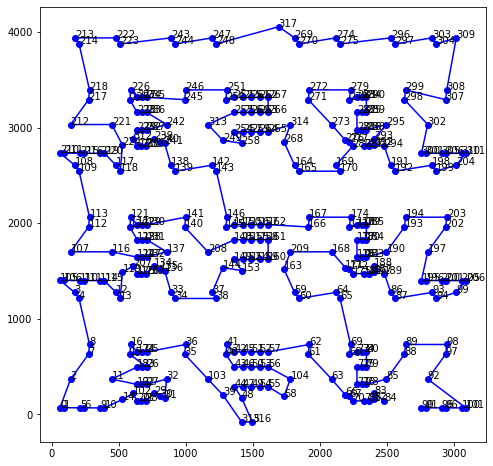

GAP IS: 0.283
Solution is valid:  True


In [31]:
x = [90,91,95,96,100,101,92,97,98,89,88,85,78,76,71,72,75,79,80,74,73,68,69,65,64,60,59,163,209,168,171,172,175,182,186,187,188,189,86,87,93,94,99,206,205,201,200,196,195,197,202,203,194,193,190,183,181,176,177,180,184,185,179,178,173,174,167,166,162,157,156,150,147,145,146,143,142,139,138,241,240,239,238,231,230,312,229,232,237,242,236,233,228,225,226,227,234,235,245,246,251,250,252,255,261,262,267,266,263,260,256,253,313,249,258,254,257,259,264,265,314,268,164,165,170,169,280,277,276,273,271,272,279,278,283,284,290,289,285,282,281,286,288,295,293,287,291,292,294,191,192,198,199,204,311,310,306,305,301,300,302,298,299,307,308,309,304,303,297,296,275,274,270,269,317,248,247,244,243,223,222,213,214,218,217,212,221,224,118,117,220,219,216,215,211,210,108,109,113,112,107,116,124,127,132,137,131,128,123,120,121,122,129,130,141,140,208,148,151,155,158,161,160,159,154,152,149,153,144,37,38,34,33,136,135,134,133,126,125,207,119,13,12,115,114,111,110,106,105,3,4,8,7,2,0,1,5,6,9,10,14,102,20,21,28,29,30,31,32,27,22,19,11,18,23,26,15,16,17,24,25,36,35,103,39,315,316,48,44,47,49,54,55,58,104,56,53,50,46,43,40,41,42,45,51,52,57,62,61,63,66,67,70,77,81,82,83,84]
P = ProblemInstance('./problems/lin318.tsp')
points = getPoints('./problems/lin318.tsp')
plotSolution(x, points)
found = compute_length(x, P.dist_matrix)
print("GAP IS:", P.GAP(found))
print("Solution is valid: ", P.ValidateSolution(x))

## FL1577

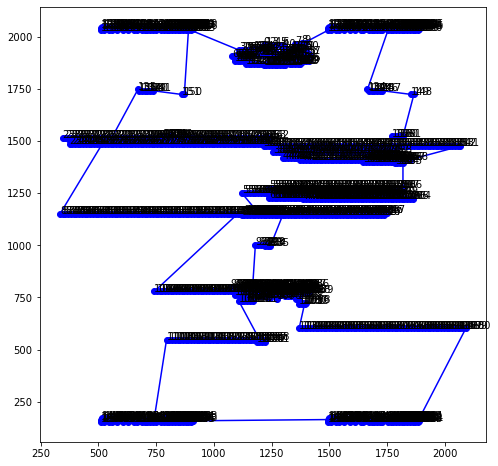

GAP IS: 2.818
Solution is valid:  True


In [34]:
x = [675,739,674,740,673,741,672,742,671,743,670,744,669,668,667,666,665,664,663,662,661,660,659,658,657,656,566,565,564,563,562,561,560,559,558,557,556,750,802,749,803,748,804,747,805,746,806,745,807,808,875,876,877,878,879,880,881,882,801,751,800,752,753,799,883,884,885,798,754,755,886,756,887,888,757,758,889,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,927,926,925,924,923,922,921,920,919,918,917,916,915,914,913,912,911,910,909,908,907,906,905,904,903,902,901,900,899,898,897,896,895,894,893,892,891,890,935,934,928,933,929,930,931,932,953,967,952,968,951,969,950,949,970,988,971,987,972,948,973,947,974,946,975,945,944,943,998,997,1050,1049,1073,1072,1007,1006,985,986,996,1008,995,1009,994,993,1063,1082,1081,1080,1069,1062,1070,1061,1071,1086,1087,1090,1074,1075,1079,1051,999,1052,1060,1078,1077,1053,1001,1000,984,976,942,983,977,941,978,940,979,939,938,937,936,1059,1058,1057,1003,1056,1004,980,981,982,1002,1005,1055,1054,1076,1089,1088,1101,1100,1097,1098,1099,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1391,1392,1439,1481,1523,1482,1524,1440,1393,1441,1483,1525,1484,1526,1485,1442,1394,1395,1443,1396,1444,1486,1527,1528,1487,1529,1445,1397,1398,1488,1530,1489,1446,1399,1447,1400,1448,1490,1531,1532,1491,1401,1449,1402,1450,1492,1533,1534,1576,1438,1437,1522,1575,1574,1521,1573,1480,1520,1479,1572,1571,1436,1435,1519,1570,1518,1569,1478,1434,1433,1477,1568,1567,1476,1432,1475,1431,1474,1517,1566,1516,1565,1564,1515,1430,1429,1428,1473,1563,1562,1514,1427,1472,1493,1403,1451,1404,1452,1494,1535,1536,1495,1537,1496,1453,1405,1406,1454,1407,1455,1497,1538,1539,1498,1540,1541,1499,1456,1408,1409,1457,1410,1411,1458,1500,1542,1501,1459,1412,1460,1502,1543,1544,1503,1413,1461,1414,1462,1504,1545,1546,1561,1560,1513,1559,1512,1558,1557,1556,1510,1555,1509,1554,1553,1552,1551,1508,1507,1550,1506,1549,1548,1547,1505,1463,1415,1464,1416,1417,1418,1465,1419,1466,1420,1467,1421,1468,1422,1469,1423,1424,1470,1511,1471,1425,1426,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1204,1203,1202,1201,1138,1137,1136,1096,1095,1094,1093,1092,1091,1048,1010,1011,989,966,990,965,991,964,954,963,955,962,956,961,957,960,958,959,1017,1016,1015,1014,992,1013,1012,1068,1083,1085,1084,1067,1066,1065,1064,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,251,250,249,248,247,246,245,244,243,242,241,240,239,238,237,236,235,234,233,232,231,230,229,228,227,226,225,224,223,222,221,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,383,382,381,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,156,198,155,199,154,200,153,201,152,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,135,136,137,138,139,140,141,151,150,1362,1317,1272,1318,1361,1319,1360,1320,1359,1321,1358,1322,1357,1323,1356,1324,1355,1325,1354,1326,1353,1327,1352,1351,1350,1328,1349,1329,1348,1347,1346,1331,1345,1332,1344,1343,1342,1341,1333,1334,1340,1335,1339,1338,1337,1336,1253,1252,1254,1251,1250,1249,1255,1248,1256,1247,1257,1246,1258,1245,1259,1244,1243,1260,1330,1261,1242,1241,1262,1240,1263,1239,1264,1238,1265,1237,1266,1236,1267,1235,1268,1234,1269,1233,1270,1232,1271,1231,1230,1273,1229,1316,1363,30,29,28,31,27,32,26,33,34,49,35,48,50,47,51,46,58,59,60,61,85,68,67,86,66,65,64,63,62,90,89,104,103,102,88,87,101,124,123,122,121,120,119,118,125,117,126,116,127,115,128,129,130,131,132,133,114,105,113,106,112,107,111,108,110,109,97,96,95,57,56,55,20,19,18,17,41,76,75,77,74,78,79,94,80,73,93,98,92,99,91,100,82,83,84,69,70,71,81,72,54,53,52,21,22,23,24,25,14,13,12,11,0,1,2,3,4,5,6,10,36,45,37,44,38,43,39,42,40,16,15,7,8,9,1364,1365,1315,1274,1228,1275,1227,1226,1225,1314,1366,1367,1313,1368,1312,1276,1224,1277,1223,1278,1369,1370,1279,1222,1221,1280,1371,1311,1372,1310,1220,1219,1373,1374,1309,1281,1282,1308,1375,1376,1377,1307,1218,1217,1378,1283,1216,1284,1215,1285,1214,1286,1213,1287,1212,1288,1211,1289,1210,1290,1209,1291,1208,1292,1207,1293,1206,1294,1205,1295,1390,1296,1389,1297,1388,1298,1387,1299,1386,1300,1385,1301,1384,1302,1383,1303,1382,1304,1381,1305,1380,1306,1379,134,142,143,144,145,146,147,149,148,161,160,159,158,157,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,405,404,403,402,401,400,399,398,397,396,395,394,393,367,368,369,370,371,372,373,374,375,376,377,378,379,380,384,385,386,387,388,389,390,391,392,447,446,445,444,443,442,441,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,335,334,333,332,331,330,329,328,327,326,325,324,323,322,321,320,319,318,317,316,315,314,313,312,311,488,487,486,485,484,483,429,482,430,481,431,480,432,479,433,478,434,477,435,476,436,475,437,474,438,473,439,472,440,471,470,469,468,501,500,499,498,497,496,495,494,493,492,491,490,502,489,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,567,655,568,654,569,653,570,652,571,651,572,650,573,649,574,648,575,647,576,646,577,645,578,644,579,643,580,642,581,641,582,640,583,639,584,638,585,637,586,636,587,635,588,634,589,633,590,632,591,631,592,630,593,629,594,628,595,627,596,626,597,625,598,624,599,623,600,622,601,621,602,620,603,619,604,618,605,617,606,616,607,615,608,614,613,612,611,610,609,704,705,706,707,708,709,710,703,711,702,712,701,713,700,714,699,715,698,716,697,717,696,718,695,719,694,720,693,721,692,722,691,723,690,724,689,725,688,726,687,727,686,728,685,729,684,730,683,731,682,732,681,733,680,734,679,735,678,736,677,737,676,738]
P = ProblemInstance('./problems/fl1577.tsp')
points = getPoints('./problems/fl1577.tsp')
plotSolution(x, points)
found = compute_length(x, P.dist_matrix)
print("GAP IS:", P.GAP(found))
print("Solution is valid: ", P.ValidateSolution(x))

## RAT783

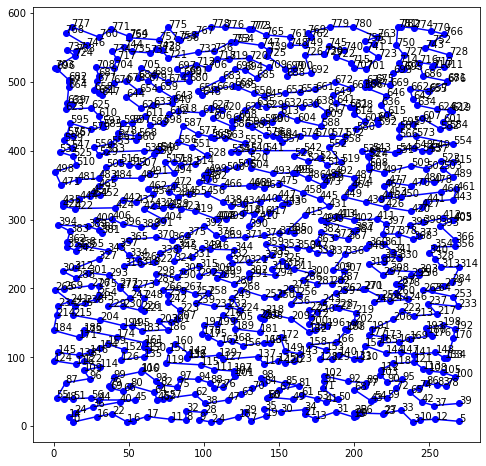

GAP IS: 2.828
Solution is valid:  True


In [35]:
x = [5,12,10,3,33,27,23,26,25,20,15,31,13,21,34,30,35,19,7,29,18,4,2,9,28,32,8,11,17,6,1,22,16,0,14,24,36,40,45,44,56,51,48,55,87,96,109,114,122,116,124,145,138,146,154,159,152,126,135,150,155,161,174,185,179,171,184,214,234,241,265,269,276,275,254,245,238,235,215,204,194,195,183,186,203,201,207,223,242,255,266,267,257,258,239,231,232,224,249,268,252,250,261,274,256,236,243,259,262,270,271,251,240,244,246,260,278,283,295,296,303,308,297,319,323,333,330,341,361,360,348,336,309,307,287,282,281,286,300,311,317,325,310,294,302,291,280,289,299,306,292,315,305,290,298,285,273,248,226,221,230,229,247,272,277,293,301,288,304,312,327,343,355,358,342,351,362,383,394,389,386,381,400,406,396,388,391,404,421,432,425,429,423,419,407,408,409,418,416,390,410,417,433,436,447,440,434,430,438,456,455,448,459,472,462,454,437,442,424,422,428,435,444,451,452,457,465,484,485,491,494,517,518,512,514,528,551,556,587,577,565,562,563,555,534,535,540,541,542,526,521,523,513,519,552,558,572,571,570,574,557,564,569,576,583,590,599,600,613,604,588,609,617,638,630,632,629,635,621,608,602,586,606,620,627,616,618,612,598,589,611,597,596,578,568,560,561,553,550,529,533,538,539,546,530,507,511,516,505,483,481,471,498,510,525,532,547,559,567,575,595,579,585,593,610,625,623,637,639,664,671,682,696,703,724,737,733,746,768,777,760,771,764,759,757,775,758,756,767,778,776,772,773,765,761,748,749,762,769,779,780,763,755,751,741,723,701,707,715,722,740,745,730,729,726,692,688,700,699,725,739,747,754,753,736,732,721,738,742,731,735,744,734,717,704,708,687,677,658,651,647,670,678,654,644,626,633,640,643,659,679,684,705,689,674,680,691,690,697,712,706,718,719,720,709,685,694,698,683,656,648,660,668,665,650,645,652,653,661,672,663,649,641,631,628,614,603,580,592,605,615,636,646,666,667,673,675,669,693,695,702,714,727,750,781,782,774,770,766,752,743,728,711,710,713,716,686,681,676,657,655,662,642,634,624,622,619,601,584,582,607,594,591,581,566,573,554,549,537,545,548,544,531,543,536,527,524,508,501,497,509,502,522,515,503,489,478,480,470,477,467,453,446,450,460,461,443,441,427,420,426,439,449,464,474,487,492,488,479,473,486,496,495,493,504,520,506,500,499,490,482,476,466,468,469,463,475,458,445,431,415,385,380,379,374,371,369,376,392,375,364,370,365,357,334,326,316,318,322,338,352,345,324,331,349,346,344,332,320,321,329,335,359,353,350,347,339,337,363,382,372,367,384,387,399,401,413,414,402,411,397,377,378,368,373,395,398,412,405,403,393,366,356,354,340,328,313,314,284,279,264,263,253,233,237,217,213,222,206,191,177,173,165,167,169,176,180,193,198,192,170,134,133,148,141,147,144,157,130,131,140,129,128,153,158,166,188,190,202,219,227,228,220,225,212,200,196,187,182,209,218,211,210,208,181,189,205,216,199,197,178,175,162,168,156,163,164,172,149,143,123,120,125,117,137,127,139,132,136,142,160,151,119,115,111,107,104,101,76,73,88,94,97,75,82,93,110,106,99,79,69,66,80,64,46,52,57,62,38,47,63,70,84,98,85,81,67,58,60,49,61,53,41,50,71,91,102,92,89,77,68,43,54,59,72,95,90,103,112,118,121,113,108,105,100,78,83,86,74,65,42,37,39]
P = ProblemInstance('./problems/rat783.tsp')
points = getPoints('./problems/rat783.tsp')
plotSolution(x, points)
found = compute_length(x, P.dist_matrix)
print("GAP IS:", P.GAP(found))
print("Solution is valid: ", P.ValidateSolution(x))

## U1060

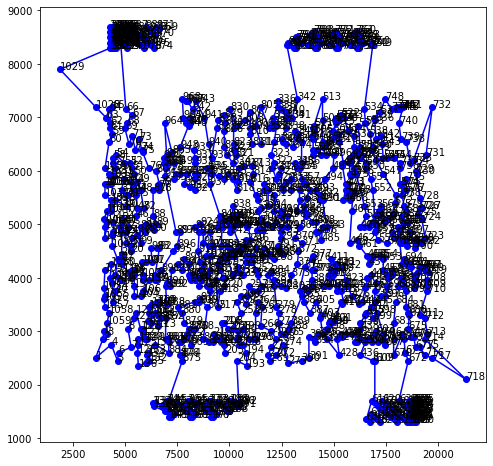

GAP IS: 3.449
Solution is valid:  True


In [37]:
x = 685,686,687,688,689,681,680,679,675,676,678,677,715,716,717,718,714,713,712,711,710,709,708,719,720,721,707,706,705,701,702,704,703,690,691,692,694,693,589,590,696,695,697,700,698,699,722,723,724,725,726,727,728,730,729,731,732,733,734,738,739,740,741,742,743,744,745,746,747,748,537,535,536,541,542,543,546,545,544,737,736,574,575,735,577,576,578,579,580,581,582,583,584,585,586,587,588,568,569,570,558,557,559,560,556,555,459,460,554,553,476,477,475,474,479,480,478,525,531,532,530,526,527,528,529,549,550,551,552,561,562,563,564,565,566,567,571,572,573,547,548,539,540,538,533,534,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,768,769,767,776,777,775,770,771,772,773,774,778,779,780,783,781,782,784,785,786,787,788,789,790,791,792,793,794,795,797,796,798,799,800,801,802,803,804,342,341,340,339,338,329,328,327,344,343,346,345,347,356,348,354,355,357,361,360,359,358,365,366,364,363,362,352,353,351,349,350,326,325,320,321,322,323,324,330,337,336,335,334,332,331,333,805,806,812,811,810,809,807,808,824,830,825,823,822,821,834,833,832,826,831,829,828,827,939,940,941,943,942,966,967,968,965,947,944,945,946,948,933,932,931,928,930,929,927,952,951,953,950,954,955,949,963,964,962,961,960,959,956,958,957,897,898,896,895,891,94,95,96,92,93,98,97,101,100,102,103,107,106,105,104,14,15,17,18,16,19,13,12,28,27,26,32,33,35,34,23,24,25,20,21,22,83,99,84,85,86,87,91,90,89,88,81,77,78,79,80,76,75,74,73,72,71,70,69,68,67,66,992,991,990,989,985,983,979,978,977,976,975,974,970,969,971,972,973,981,980,982,984,986,987,988,993,994,995,996,998,997,1003,1004,1005,1023,1022,1024,1025,1020,1019,1011,1008,1010,1009,1021,1006,1007,1002,1001,999,1000,1013,1012,1014,1015,1016,1017,1018,1026,1027,1029,1028,63,64,65,62,61,59,60,1030,1031,1032,56,55,57,58,54,53,52,51,50,49,48,82,46,47,45,44,43,42,38,37,39,41,40,36,1033,1034,1035,1036,1037,1038,1039,1040,1044,1045,1047,1048,1046,1041,1043,1042,1049,31,30,29,11,10,9,1052,1053,1050,1051,1054,1055,1056,1057,1058,1059,3,0,2,1,4,5,6,7,8,121,122,123,128,127,130,129,124,125,126,136,135,132,134,133,131,884,886,885,883,882,887,113,111,112,114,115,119,120,117,118,116,110,108,109,888,889,890,892,893,894,900,899,901,902,905,903,904,906,907,911,912,913,914,915,916,925,926,924,923,917,922,921,919,918,920,860,861,862,864,863,219,217,218,220,222,221,858,857,859,856,855,224,225,226,223,231,232,233,234,249,250,235,238,239,246,244,245,243,241,240,242,839,838,840,844,845,843,842,841,237,236,230,229,227,228,852,853,854,851,850,849,846,847,848,937,934,935,936,938,837,835,836,818,819,820,817,813,814,816,815,316,305,317,318,304,306,315,307,314,313,312,308,303,302,300,301,319,299,297,298,296,295,294,293,292,289,290,291,288,287,286,311,310,309,247,248,251,252,254,253,255,256,257,262,261,260,259,258,206,207,208,216,211,210,209,205,212,213,215,214,866,867,865,910,909,908,881,880,879,871,870,868,869,872,873,877,878,876,874,875,145,144,142,143,140,139,137,138,141,147,146,148,149,150,151,152,153,154,156,157,155,164,165,159,158,160,161,162,163,166,167,168,171,170,169,175,174,172,173,176,177,178,179,180,181,182,183,185,184,186,187,188,189,190,191,192,204,193,194,198,203,202,201,200,199,197,196,195,263,264,265,266,267,268,271,270,269,272,274,273,390,391,392,393,394,395,396,404,403,405,387,386,383,382,381,380,379,378,377,376,375,384,385,389,388,275,276,277,278,279,282,285,284,283,281,280,373,374,372,371,370,369,368,367,489,488,487,486,485,484,483,491,490,492,493,494,495,496,497,498,506,507,508,509,510,505,512,511,513,504,500,499,501,502,517,503,515,514,516,520,521,522,523,524,519,518,481,482,473,471,470,469,472,465,466,467,468,464,463,462,461,458,457,456,455,454,453,452,594,591,592,593,595,596,597,445,450,451,449,448,446,447,441,440,426,425,424,423,422,421,419,420,411,410,409,406,407,408,412,414,413,418,417,416,415,401,400,402,399,398,397,428,427,429,430,431,432,434,433,435,437,438,439,442,443,444,599,598,606,608,607,605,603,604,602,601,600,436,610,609,612,611,614,615,613,616,617,623,618,619,620,621,622,624,625,627,626,628,631,630,629,635,636,637,638,639,645,646,647,650,649,648,644,660,661,643,640,641,642,662,657,658,659,652,651,653,654,656,655,665,664,666,663,667,669,668,634,633,632,672,671,673,674,670,682,683,684
P = ProblemInstance('./problems/u1060.tsp')
points = getPoints('./problems/u1060.tsp')
plotSolution(x, points)
found = compute_length(x, P.dist_matrix)
print("GAP IS:", P.GAP(found))
print("Solution is valid: ", P.ValidateSolution(x))

## CH130

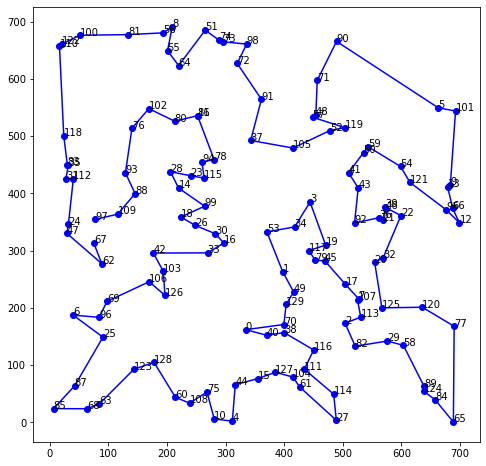

GAP IS: 0.0
Solution is valid:  True


In [38]:
x = [67,62,47,24,112,31,35,83,118,110,122,100,81,56,8,55,64,51,74,73,98,72,91,37,105,52,119,57,48,71,90,5,101,9,13,66,12,95,121,54,59,50,41,43,92,36,21,46,39,22,32,20,125,120,77,65,84,124,89,58,29,82,2,113,107,7,17,45,79,117,19,3,34,53,1,49,129,70,0,40,38,116,111,114,27,61,104,127,15,44,4,10,75,108,60,128,123,63,68,85,87,25,6,96,69,106,126,103,42,33,16,30,26,18,99,14,28,23,115,94,78,86,11,80,102,76,93,88,109,97]
P = ProblemInstance('./problems/ch130.tsp')
points = getPoints('./problems/ch130.tsp')
plotSolution(x, points)
found = compute_length(x, P.dist_matrix)
print("GAP IS:", P.GAP(found))
print("Solution is valid: ", P.ValidateSolution(x))

## EIL76

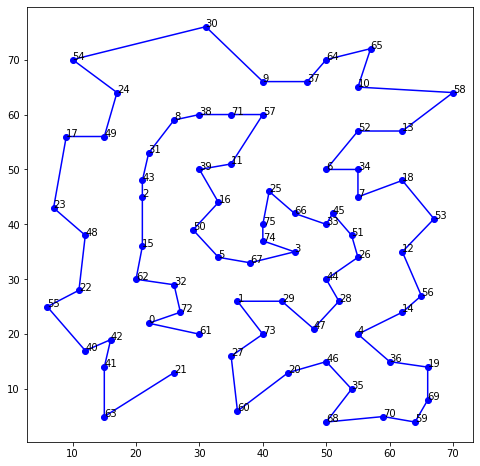

GAP IS: 0.0
Solution is valid:  True


In [39]:
x = [61,0,72,32,62,15,2,43,31,8,38,71,57,11,39,16,50,5,67,3,74,75,25,66,33,45,51,26,44,28,47,29,1,73,27,60,20,46,35,68,70,59,69,19,36,4,14,56,12,53,18,7,34,6,52,13,58,10,65,64,37,9,30,54,24,49,17,23,48,22,55,40,42,41,63,21]
P = ProblemInstance('./problems/eil76.tsp')
points = getPoints('./problems/eil76.tsp')
plotSolution(x, points)
found = compute_length(x, P.dist_matrix)
print("GAP IS:", P.GAP(found))
print("Solution is valid: ", P.ValidateSolution(x))

## D198

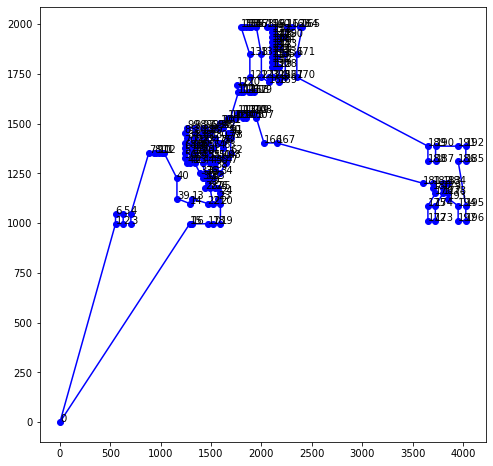

GAP IS: 0.089
Solution is valid:  True


In [41]:
x = [3,4,7,8,9,10,11,12,40,39,14,13,22,21,27,28,29,31,30,37,43,54,59,66,69,72,71,67,58,55,42,41,56,57,68,70,84,85,99,98,86,83,87,97,96,88,89,95,94,100,93,92,101,102,103,114,121,120,115,116,117,118,119,122,138,153,154,155,156,157,158,137,123,168,124,125,130,129,132,131,133,139,141,146,147,152,159,160,161,151,148,145,142,140,134,135,128,126,169,127,136,143,144,149,150,162,163,164,165,171,170,189,188,187,190,191,192,185,186,195,196,197,194,193,178,184,183,179,177,174,173,172,175,176,180,182,181,167,166,107,108,109,110,106,105,111,112,113,104,91,90,79,78,62,48,47,34,38,46,50,49,63,77,76,75,80,64,51,45,52,61,74,81,82,73,65,60,53,44,36,35,32,33,26,25,24,23,20,19,18,17,16,15,0,1,6,5,2]
P = ProblemInstance('./problems/d198.tsp')
points = getPoints('./problems/d198.tsp')
plotSolution(x, points)
found = compute_length(x, P.dist_matrix)
print("GAP IS:", P.GAP(found))
print("Solution is valid: ", P.ValidateSolution(x))

## KROA100

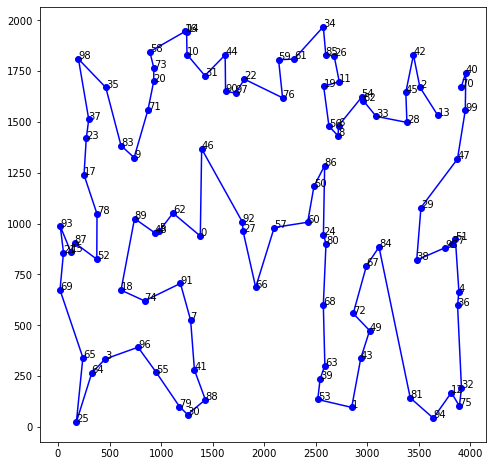

GAP IS: 0.0
Solution is valid:  True


In [43]:
x = [70,40,99,47,29,38,95,77,51,4,36,32,75,12,94,81,84,67,72,49,43,1,53,39,63,68,80,24,86,50,60,57,66,27,92,46,0,62,5,48,89,18,74,91,7,41,88,30,79,55,96,3,64,25,65,69,21,93,15,87,52,78,17,23,37,98,35,83,9,71,20,73,58,16,14,10,31,44,90,97,22,76,59,61,34,85,26,11,19,56,8,6,54,82,33,28,45,42,2,13]
P = ProblemInstance('./problems/kroA100.tsp')
points = getPoints('./problems/kroA100.tsp')
plotSolution(x, points)
found = compute_length(x, P.dist_matrix)
print("GAP IS:", P.GAP(found))
print("Solution is valid: ", P.ValidateSolution(x))